# *************************************************************************** #
# *************************************************************************** #
# TP7 : APPLICATIONS CHOISIES DES BASES DE GROEBNER                           #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************

[(4/5, 12/5)]
La liste des points d'inflexions est : [(4/5, 12/5)]


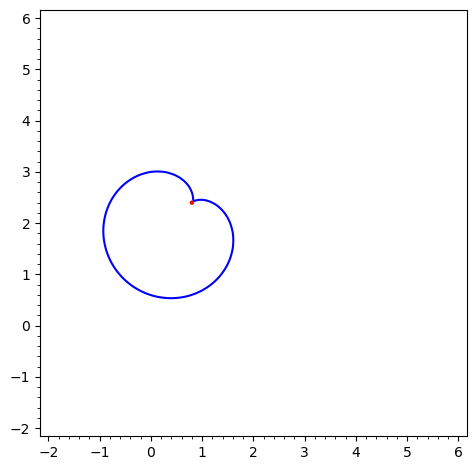

In [10]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP7 : APPLICATIONS CHOISIES DES BASES DE GROEBNER                           #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y> = PolynomialRing(QQ,2,order="lex")
f = 5*x^4 - 10*x^3 + 10*x^2*y^2 - 40*x^2*y + 40*x^2 - 10*x*y^2 + 40*x*y - 32*x + 5*y^4 - 40*y^3 + 115*y^2 - 136*y + 48

# Code pour l'EXERCICE

grad = vector(MPol, [f.derivative(x),f.derivative(y)])

I = Ideal(f,grad[0],grad[1])
basis = I.groebner_basis()

yroots = basis[1].univariate_polynomial().roots()
roots = [(x,yval) for yval, _ in yroots for x,_ in basis[0].subs({y:yval}).univariate_polynomial().roots() for yval, _ in yroots]
print(roots)

PtsSinguliers = roots


# # Affichage des resultats

print("La liste des points d'inflexions est :",PtsSinguliers)
G1 = implicit_plot(f,(x,-2,6),(y,-2,6),color='blue')
G2 = points(PtsSinguliers,color='red')
show(G1+G2)

reset()

In [47]:
print("""\
# ****************************************************************************
#  VALUATIONS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

A.<x,y,z> = AffineSpace(QQ, 3)
QQ5.<rac5> = QuadraticField(5)
f1 = x^2+y^2-1
f2 = 5*x-(z-3)^2
Z = Curve([f1,f2],A)
n = z^2-6*z+5
d = x^2-x+y^2

# Code pour l'EXERCICE

crossprod = vector(f1.gradient()).cross_product(vector(f2.gradient()))

I = Ideal(f1,f2,crossprod[0],crossprod[1],crossprod[2])
basis = I.groebner_basis()

reponse2="La base de groebner vaut [1] donc le produit vectoriel ne s'annule pas sur la courbe, la variété est lisse"

I = Ideal(f1,f2,n)
basis = I.groebner_basis()
zeros_without_mult = [(x,y,z) for x,_ in basis[2].univariate_polynomial().roots(QQ5) for y,_ in basis[0].univariate_polynomial().roots(QQ5) for z,_ in basis[1].univariate_polynomial().roots(QQ5)]
deg = f1.degree()*f2.degree()*n.degree()
zeros=[]
for (xx,yy,zz) in zeros_without_mult :
    v = (x - xx) + (y - yy) + (z - zz)
    v = v^deg
    I = Ideal(f1,f2,n,v)
    ordre = len(I.normal_basis())
    zeros.append(((x,y,z),ordre))


I = Ideal(f1,f2,d)
basis = I.groebner_basis()
poles_without_mult = [(x,y,z) for x,_ in basis[2].univariate_polynomial().roots(QQ5) for y,_ in basis[0].univariate_polynomial().roots(QQ5) for z,_ in basis[1].univariate_polynomial().roots(QQ5)]
poles = []
for (xx,yy,zz) in poles_without_mult :
    v = (x - xx) + (y - yy) + (z - zz)
    v = v^deg
    I = Ideal(f1,f2,d,v)
    ordre = len(I.normal_basis())
    poles.append(((x,y,z),ordre))



var('theta')
x(theta) = sin(theta)
y(theta) = cos(theta)
z(theta) = 3 + sqrt(5*sin(theta))
Z1 = parametric_plot3d((x,y,z),(theta,0,pi))  

var('theta')
x(theta) = sin(theta)
y(theta) = cos(theta)
z(theta) = 3 - sqrt(5*sin(theta))
Z2 = parametric_plot3d((x,y,z),(theta,0,pi)) 

# # Affichage des resultats

show(Z1+Z2)

print(reponse2)
print("Confirmation de la lissité de la courbe : ", Z.is_smooth())

print("L'ensemble des zeros munis de leur multiplicité de h est",zeros)
print("L'ensemble des poles munis de leur multiplicité de h est",poles)



reset()

# ****************************************************************************
#  VALUATIONS
# ****************************************************************************



Graphics3d Object

La base de groebner vaut [1] donc le produit vectoriel ne s'annule pas sur la courbe, la variété est lisse
Confirmation de la lissité de la courbe :  True
L'ensemble des zeros munis de leur multiplicité de h est [((x, y, z), 1), ((x, y, z), 1), ((x, y, z), 1), ((x, y, z), 1)]
L'ensemble des poles munis de leur multiplicité de h est [((x, y, z), 2), ((x, y, z), 2)]


# ****************************************************************************
#  ENVELOPPE
# ****************************************************************************

La courbe (Ct) est un cercle dont le centre décrit une parabole quand t varie
L'enveloppe de la famille de courbe a pour equation y^4 + 2*x^2*y^3 - 8*x*y^3 + 1/2*y^3 + x^4*y^2 - 8*x^3*y^2 - 6*x^2*y^2 + 88*x*y^2 - 1535/16*y^2 - 11/2*x^4*y + 44*x^3*y + 81/8*x^2*y - 785/2*x*y + 486*y + x^6 - 12*x^5 + 865/16*x^4 - 225/2*x^3 - 76*x^2 + 692*x - 2897/4


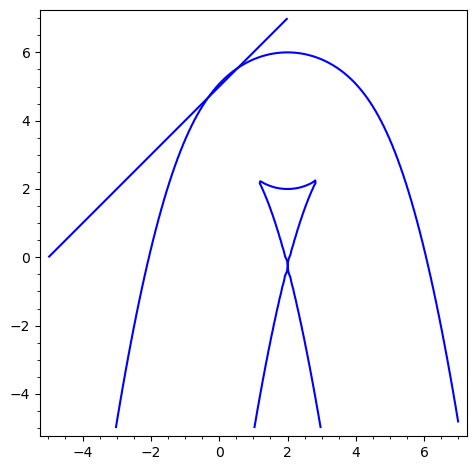

La bille expulsée tape-t-elle le toit ? Les billes frôlent le toit mais ne le tapent pas


In [79]:
print("""\
# ****************************************************************************
#  ENVELOPPE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,t> = PolynomialRing(QQ,3,order="invlex") # ORDRE DES VARIABLES A FIXER
f = (x-t)^2+(y+t^2-4*t)^2-4

# Code pour l'EXERCICE

reponse1 = "La courbe (Ct) est un cercle dont le centre décrit une parabole quand t varie"

deriv = f.derivative(t)
I = Ideal(f,deriv)

basis = I.groebner_basis()

eq_enveloppe = basis[-1]
env(x,y) = eq_enveloppe

reponse4 = "Les billes frôlent le toit mais ne le tapent pas"

# # Affichage des resultats

print(reponse1)

print("L'enveloppe de la famille de courbe a pour equation",eq_enveloppe)
G = implicit_plot(env,(x,-5,7),(y,-5,7))
D = implicit_plot(x+5-y,(x,-5,7),(y,-5,7))
show(G+D)

print("La bille expulsée tape-t-elle le toit ?", reponse4)

reset()

# ****************************************************************************
#  COLORATION DE GRAPHES
# ****************************************************************************



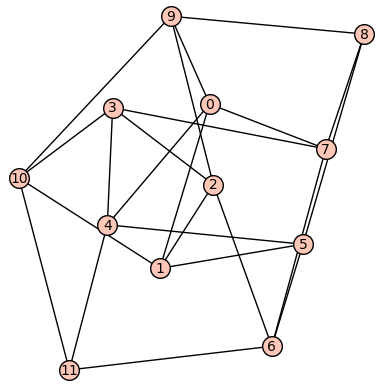

Il faut 3 couleurs pour colorer ce graphe
Une base de Groebner de I(G,3) est [x11 - x0, x10 + x1 + x0, x9 - x1, x8 - x0, x7 + x1 + x0, x6 - x1, x5 + x1 + x0, x4 - x1, x3 - x0, x2 + x1 + x0, x1^2 + x0*x1 + x0^2, x0^3 - 1]
La base de Groebner triangularise le système, et ne laisse pas de liberté pour la manière de colorier le graphe


/tmp/ipykernel_3935/1702672958.py:22: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See http://trac.sagemath.org/22349 for details.
  IG= Ideal(MPol, [phi(MPol.gen(v)) for v in G.vertices()] + [psi(MPol.gen(u),MPol.gen(v)) for (u,v) in G.edges(labels=false)])
/tmp/ipykernel_3935/1702672958.py:22: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://trac.sagemath.org/27408 for details.
  IG= Ideal(MPol, [phi(MPol.gen(v)) for v in G.vertices()] + [psi(MPol.gen(u),MPol.gen(v)) for (u,v) in G.edges(labels=false)])


In [83]:
print("""\
# ****************************************************************************
#  COLORATION DE GRAPHES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

G= Graph(12)
G.add_cycle(range(8))
G.add_edges([(i,i+4) for i in range(4) ])
G.add_edges([(8,5),(8,7),(9,0),(9,2),(10,1), (10,3),(11,4),(11,6) ])
G.add_edges([(8,9),(9,10),(10,11)])
G.show()
G.coloring()

MPol = PolynomialRing(QQ,12,'x',
order = 'invlex')
phi (v) = v^3-1
psi (u,v) = u^2+u*v+v^2
IG= Ideal(MPol, [phi(MPol.gen(v)) for v in G.vertices()] + [psi(MPol.gen(u),MPol.gen(v)) for (u,v) in G.edges(labels=false)])

# Code pour l'EXERCICE

reponse1 = len(G.coloring())
base = IG.groebner_basis()
reponse3 = "La base de Groebner triangularise le système, et ne laisse pas de liberté pour la manière de colorier le graphe"

# # Affichage des resultats

print("Il faut",reponse1,"couleurs pour colorer ce graphe")
print("Une base de Groebner de I(G,3) est", base)
print(reponse3)

reset()

In [ ]:
print("""\
# ****************************************************************************
#  PREUVE DE THEOREMES GEOMETRIQUES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,u,v> = PolynomialRing(QQ,4)


# Code pour l'EXERCICE

IA = Ideal(MPol,[1])
IB = Ideal(MPol,[1])
IC = Ideal(MPol,[1])

reponse2  = "votre reponse pour la question 2"

reponse4 = "votre reponse pour la question 4"

# # Affichage des resultats

print("Les idéaux IA, IB et IC sont", IA, IB, IC)
print(reponse2)
print("detailler votre raisonnement pour la question 3")
print(reponse4)



reset()

In [87]:
print("""\
# ****************************************************************************
#  PROGRAMMATION ENTIERE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<p,n,d,q> = PolynomialRing(QQ,4,order="lex")
I=Ideal([p^5-n,p^10-d,p^25-q])

# Code pour l'EXERCICE

base = I.groebner_basis()
reponse2 = """Le minimum est donné par p=2, n=0, d=4 et q=3, ce qui correspond aux exposants de la réduction\
de p^177 modulo I. Cela fonctionne car on a choisi l'ordre lexicographique, donc la réduction va en priorité\
\"convertir\" le plus de puissances de p en puissances de n, puis les puissances de n en puissances de d etc."""

# # Affichage des resultats

print("Base de Groebner",base)
print((p^117).reduce(I))
print(reponse2)

reset()

# ****************************************************************************
#  PROGRAMMATION ENTIERE
# ****************************************************************************

Base de Groebner [p^5 - n, n^2 - d, n*d^2 - q, n*q - d^3, d^5 - q^2]
p^2*d^4*q^3
Le minimum est donné par p=2, n=0, d=4 et q=3, ce qui correspond aux exposants de la réductionde p^177 modulo I. Cela fonctionne car on a choisi l'ordre lexicographique, donc la réduction va en priorité"convertir" le plus de puissances de p en puissances de n, puis les puissances de n en puissances de d etc.
